# POOLING LAYER

The feature maps generated by the convolutional layer are subsequently forwarded to the pooling layer. Pooling layers play a crucial role in reducing the spatial dimensions (width and height) of these feature maps, a process commonly referred to as downsampling. This reduction in dimensionality is essential for controlling computational complexity, creating translation invariance, and emphasizing important local features within the feature maps.

The image below shows a single sequence of convolution and pooling.

![max pooling](https://storage.googleapis.com/rg-ai-bootcamp/cnn/conv-act-pool.png)

Similar to the convolutional layer, the pooling operation sweeps a filter across the entire input, but the difference is that this filter does not have any weights. Instead, the kernel applies an aggregation function to the values within the receptive field, populating the output array. Also normally the kernel does not overlap in a pooling layer.

## Main type of Pooling

There are two main types of pooling:
- Max pooling: As the filter moves across the input, it selects the pixel with the maximum value to send to the output array. As an aside, this approach tends to be used more often compared to average pooling.
- Average pooling: As the filter moves across the input, it calculates the average value within the receptive field to send to the output array.

The most popular process is max pooling, which reports the maximum output from the neighborhood.

![Figure 4: Pooling Operation (Source: O’Reilly Media)](https://storage.googleapis.com/rg-ai-bootcamp/cnn/pooling-layer.png)


In [ ]:
!pip install numpy matplotlib

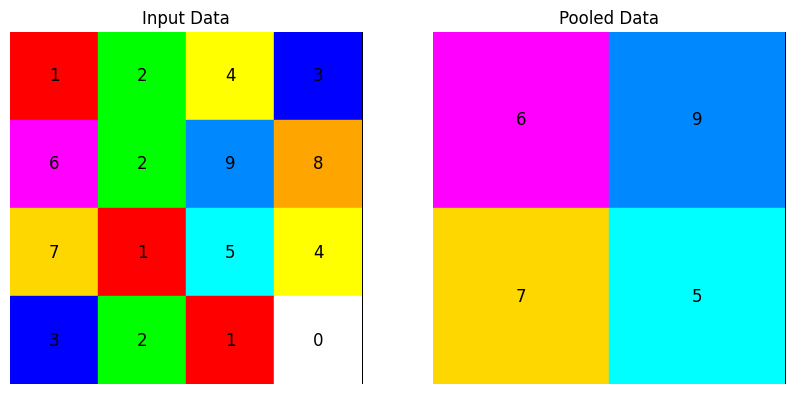

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create input data (2D array)
input_data = np.array([[1, 2, 4, 3],
                       [6, 2, 9, 8],
                       [7, 1, 5, 4],
                       [3, 2, 1, 0]])

# Define pooling function (e.g., max pooling)
def max_pooling(input_array, pool_size):
    output_shape = (input_array.shape[0] // pool_size, input_array.shape[1] // pool_size)
    output_array = np.zeros(output_shape)

    for i in range(0, input_array.shape[0], pool_size):
        for j in range(0, input_array.shape[1], pool_size):
            pool_region = input_array[i:i+pool_size, j:j+pool_size]
            output_array[i//pool_size, j//pool_size] = np.max(pool_region)

    return output_array

# Apply pooling
pool_size = 2
output_data = max_pooling(input_data, pool_size)

# Create subplots for input and output data
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Define custom colors for boxes
colors = ['#FFFFFF', '#FF0000', '#00FF00', '#0000FF', '#FFFF00', '#00FFFF', '#FF00FF', '#FFD700', '#FFA500', '#0088FF']

# Plot input data with numbers and boxes using a custom colormap
axs[0].imshow(np.zeros_like(input_data), cmap='gray', interpolation='nearest')
for i in range(input_data.shape[0]):
    for j in range(input_data.shape[1]):
        num = int(input_data[i, j])  # Convert to integer
        color = colors[num] if num < len(colors) else 'white'
        rect = plt.Rectangle((j - 0.5, i - 0.5), 1, 1, fill=True, color=color)
        axs[0].add_patch(rect)
        axs[0].text(j, i, str(num), va='center', ha='center', color='black', fontsize=12)
axs[0].set_title('Input Data')
axs[0].axis('off')

# Plot output data with numbers and boxes using a custom colormap
axs[1].imshow(np.zeros_like(output_data), cmap='gray', interpolation='nearest')
for i in range(output_data.shape[0]):
    for j in range(output_data.shape[1]):
        num = int(output_data[i, j])  # Convert to integer
        color = colors[num] if num < len(colors) else 'white'
        rect = plt.Rectangle((j - 0.5, i - 0.5), 1, 1, fill=True, color=color)
        axs[1].add_patch(rect)
        axs[1].text(j, i, str(num), va='center', ha='center', color='black', fontsize=12)
axs[1].set_title('Pooled Data')
axs[1].axis('off')

plt.show()


## Pooling Layer Output Volume

If we have an activation map of size W x W x D, a pooling kernel of spatial size F, and stride S, then the size of output volume can be determined by the following formula:

$$
W_{out} = \frac{W - F}{S} + 1
$$

This will yield an output volume of size $$W_{out} \times W_{out} \times D$$

In all cases, pooling provides some translation invariance which means that an object would be recognizable regardless of where it appears on the frame.